In [129]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Data sample
data = {
    'Account_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Automation': ['medium', 'low', 'medium', 'high', 'medium', 'high', 'medium', 'low', 'medium', 'high', 'low', 'medium', 'high', 'medium', 'high'],
    'Chatbots': ['medium', 'high', 'low', 'medium', 'high', 'medium', 'high', 'low', 'low', 'high', 'high', 'low', 'medium', 'high', 'medium'],
    'Analytics': ['low', 'medium', 'high', 'low', 'high', 'high', 'low', 'medium', 'high', 'medium', 'medium', 'high', 'low', 'high', 'high'],
    'Custom_roles': ['high', 'medium', 'high', 'low', 'medium', 'medium', 'low', 'medium', 'medium', 'high', 'medium', 'high', 'low', 'medium', 'medium'],
    'FAQ': ['high', 'low', 'high', 'high', 'high', 'high', 'high', 'medium', 'high', 'medium', 'high', 'high', 'high', 'high', 'high'],
    'Audit_logs': ['medium', 'high', 'low', 'high', 'high', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'low', 'high', 'high'],
    'Versioning': ['low', 'medium', 'medium', 'medium', 'low', 'high', 'low', 'medium', 'high', 'medium', 'low', 'medium', 'medium', 'medium', 'low'],
    'App_install': ['high', 'low', 'medium', 'high', 'high', 'low', 'medium', 'low', 'medium', 'high', 'medium', 'high', 'high', 'low', 'medium'],
    'Email': ['high', 'high', 'medium', 'high', 'medium', 'high', 'medium', 'high', 'medium', 'high', 'high', 'medium', 'high', 'medium', 'high'],
    'Phone': ['medium', 'low', 'low', 'high', 'high', 'high', 'low', 'medium', 'high', 'medium', 'high', 'high', 'high', 'low', 'medium'],
    'Custom_fields': ['low', 'medium', 'low', 'low', 'medium', 'medium', 'low', 'medium', 'medium', 'low', 'low', 'medium', 'low', 'low', 'medium'],
    'GenAI': ['high', 'low', 'high', 'high', 'high', 'high', 'high', 'low', 'high', 'high', 'high', 'high', 'high', 'high', 'high']
}

df = pd.DataFrame(data)
df.head()

,Account_ID,Automation,Chatbots,Analytics,Custom_roles,FAQ,Audit_logs,Versioning,App_install,Email,Phone,Custom_fields,GenAI
0,1,medium,medium,low,high,high,medium,low,high,high,medium,low,high
1,2,low,high,medium,medium,low,high,medium,low,high,low,medium,low
2,3,medium,low,high,high,high,low,medium,medium,medium,low,low,high
3,4,high,medium,low,low,high,high,medium,high,high,high,low,high
4,5,medium,high,high,medium,high,high,low,high,medium,high,medium,high


In [130]:
# Dropping Account_ID for feature clustering
df_features = df.drop(columns=['Account_ID'])
df_features.head()

,Automation,Chatbots,Analytics,Custom_roles,FAQ,Audit_logs,Versioning,App_install,Email,Phone,Custom_fields,GenAI
0,medium,medium,low,high,high,medium,low,high,high,medium,low,high
1,low,high,medium,medium,low,high,medium,low,high,low,medium,low
2,medium,low,high,high,high,low,medium,medium,medium,low,low,high
3,high,medium,low,low,high,high,medium,high,high,high,low,high
4,medium,high,high,medium,high,high,low,high,medium,high,medium,high


In [131]:
# Encoding categorical usage levels
encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']] * df_features.shape[1])
df_encoded = pd.DataFrame(encoder.fit_transform(df_features), columns=df_features.columns)
df_encoded.head()

,Automation,Chatbots,Analytics,Custom_roles,FAQ,Audit_logs,Versioning,App_install,Email,Phone,Custom_fields,GenAI
0,1.0,1.0,0.0,2.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,2.0
1,0.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0
2,1.0,0.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0
3,2.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,2.0
4,1.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,1.0,2.0,1.0,2.0


In [132]:
# Identifying feature correlation
corr_matrix = df_encoded.corr()
corr_matrix

,Automation,Chatbots,Analytics,Custom_roles,FAQ,Audit_logs,Versioning,App_install,Email,Phone,Custom_fields,GenAI
Automation,1.000000,-0.030737,-0.044603,-0.154776,0.410146,-0.123253,0.199001,0.430311,0.151620,0.289917,-0.173702,0.619103
Chatbots,-0.030737,1.000000,-0.238541,-0.259691,-0.211656,0.277888,-0.456123,-0.027397,0.135147,-0.238541,-0.320721,0.064923
Analytics,-0.044603,-0.238541,1.000000,0.447503,0.111687,0.168803,0.318689,-0.337934,-0.457604,0.038462,0.577747,0.094211
Custom_roles,-0.154776,-0.259691,0.447503,1.000000,-0.125389,0.107199,0.030024,0.105499,-0.120096,-0.141317,0.104828,0.038462
FAQ,0.410146,-0.211656,0.111687,-0.125389,1.000000,-0.236013,-0.142374,0.365587,-0.379663,0.390905,-0.264082,0.843527
Audit_logs,-0.123253,0.277888,0.168803,0.107199,-0.236013,1.000000,-0.334728,0.084013,0.063758,-0.018756,0.240000,-0.199083
Versioning,0.199001,-0.456123,0.318689,0.030024,-0.142374,-0.334728,1.000000,-0.329422,-0.041667,0.196116,0.286411,-0.120096
App_install,0.430311,-0.027397,-0.337934,0.105499,0.365587,0.084013,-0.329422,1.000000,-0.033787,0.457204,-0.320721,0.551843
Email,0.151620,0.135147,-0.457604,-0.120096,-0.379663,0.063758,-0.041667,-0.033787,1.000000,0.196116,-0.054554,-0.320256
Phone,0.289917,-0.238541,0.038462,-0.141317,0.390905,-0.018756,0.196116,0.457204,0.196116,1.000000,0.256776,0.329739


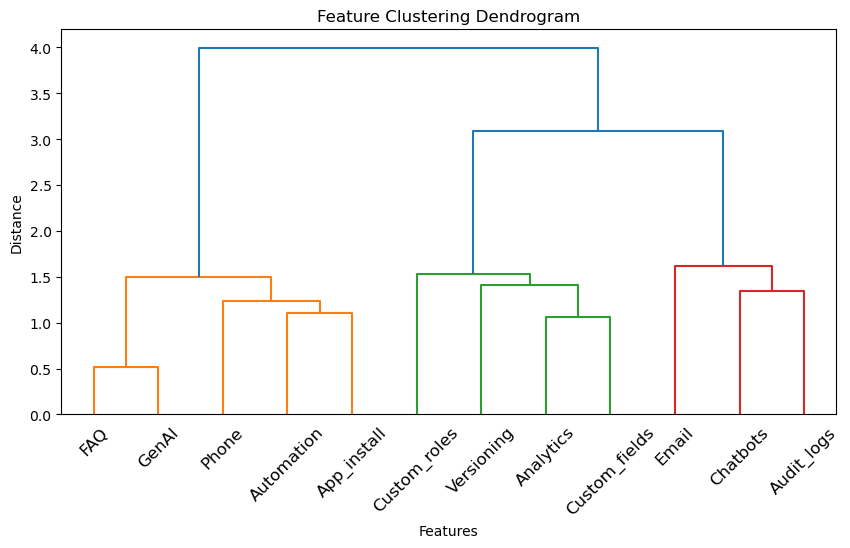

In [133]:
# Plotting the hierarchical clustering dendrogram
plt.figure(figsize=(10, 5))
linkage_matrix = sch.linkage(corr_matrix, method='ward')
sch.dendrogram(linkage_matrix, labels=corr_matrix.columns, leaf_rotation=45)
plt.title("Feature Clustering Dendrogram")
plt.xlabel("Features")
plt.ylabel("Distance")
plt.show()

In [134]:
# Storing clusters identified in dendrogram
threshold = 1.5  # Set the distance threshold
cluster_labels = sch.fcluster(linkage_matrix, t=threshold, criterion='distance')

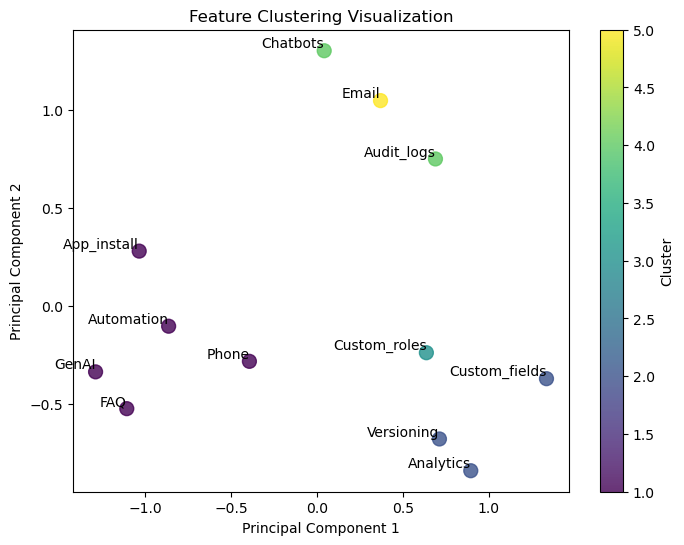

In [135]:
from sklearn.decomposition import PCA

# Applying PCA to reduce the correlation matrix to 2D for visualization
pca = PCA(n_components=2)
pca_results = pca.fit_transform(corr_matrix)

# Creating a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_results[:, 0], pca_results[:, 1], c=cluster_labels, cmap="viridis", s=100, alpha=0.8
)

# Add feature names as labels
for i, feature in enumerate(corr_matrix.columns):
    plt.text(
        pca_results[i, 0],
        pca_results[i, 1],
        feature,
        fontsize=10,
        ha="right",
        va="bottom"
    )

# Add plot details
plt.title("Feature Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Cluster")
plt.show()

In [136]:
cluster_assignments = pd.DataFrame({
    'Feature': corr_matrix.columns,
    'Cluster': cluster_labels
})

print(cluster_assignments)

          Feature  Cluster
0      Automation        1
1        Chatbots        4
2       Analytics        2
3    Custom_roles        3
4             FAQ        1
5      Audit_logs        4
6      Versioning        2
7     App_install        1
8           Email        5
9           Phone        1
10  Custom_fields        2
11          GenAI        1
